# Qualité de l'air de la station Châtelet
 

# Partie 1 : Nettoyage des données
 
---
---


# Description du problème

Notre objectif est de construire un modèle qui permet de prévoir la qualité de l'air de la station Chatelêt (ligne 4) : nous nous concentrons ici uniquement sur la quantité de dioxyde de carbone (CO2). 

Le CO2 est suivi en air intérieur non pas en raison de sa toxicité mais comme indicateur de confinement.

Les données originales portent sur les paramètres climatiques usuels (température, humidité relative), le renouvellement d’air (dioxyde de carbone) et la qualité de l’air (oxydes d‘azote, particules).

Elles ont été relevées par la RATP entre le 1e janvier 2013 et le 13 septembre 2021. 
 
***


### Contenu
* Librairies
* Données originales
* Nettoyage des données
* Données extraites

***

# Librairies

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
pd.options.display.max_rows = 50

# Données originales

In [3]:
dataset_original = pd.read_csv('datasets/qualite-de-lair-mesuree-dans-la-station-chatelet.csv', header=0, sep=";", decimal=',', parse_dates=True)

In [4]:
dataset_original.head()

,dateheure,nocha4,n2cha4,10cha4,c2cha4,tcha4,hycha4
0,2021-09-13T02:00:00+02:00,2,31,46,464,"21,1","50,2"
1,2021-09-13T01:00:00+02:00,2,33,43,471,"21,3","48,7"
2,2021-09-13T00:00:00+02:00,2,28,48,503,"21,6","48,3"
3,2021-09-12T23:00:00+02:00,2,19,55,517,"21,8","47,9"
4,2021-09-12T22:00:00+02:00,2,18,58,552,"22,1","47,9"


#### Signification des variables
* no = monoxyde d'azote (µg/m3)
* n2 = no2 = dioxyde d'azote (µg/m3)
* 10 = PM10 = particules en suspension de diamètre < 10 micromètres (µg/m3)
* c2 = co2 = dioxyde de carbone (ppm = partie par million = mg/kg)
* t = température (°C)
* hy = humidité relative (%)

In [5]:
# copie des données originales
data = dataset_original.copy()

# Nettoyage des données

## Format des données 

In [6]:
data.shape

(76030, 7)

## Types de variables

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76030 entries, 0 to 76029
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dateheure  76030 non-null  object
 1   nocha4     54701 non-null  object
 2   n2cha4     62639 non-null  object
 3   10cha4     63413 non-null  object
 4   c2cha4     63726 non-null  object
 5   tcha4      65445 non-null  object
 6   hycha4     65456 non-null  object
dtypes: object(7)
memory usage: 4.1+ MB


Nous allons convertir 'dateheure' en datetime et les autres variables en numérique (float). 

### Conversion en datetime 

In [8]:
# convertir 'dateheure' en datetime
data['dateheure'] = pd.to_datetime(data['dateheure'], format='%Y-%m-%dT%H:%M:%S%z', utc=True)

Vérifions :

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76030 entries, 0 to 76029
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   dateheure  76030 non-null  datetime64[ns, UTC]
 1   nocha4     54701 non-null  object             
 2   n2cha4     62639 non-null  object             
 3   10cha4     63413 non-null  object             
 4   c2cha4     63726 non-null  object             
 5   tcha4      65445 non-null  object             
 6   hycha4     65456 non-null  object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 4.1+ MB


In [10]:
data['dateheure'].head()

0   2021-09-13 00:00:00+00:00
1   2021-09-12 23:00:00+00:00
2   2021-09-12 22:00:00+00:00
3   2021-09-12 21:00:00+00:00
4   2021-09-12 20:00:00+00:00
Name: dateheure, dtype: datetime64[ns, UTC]

### Conversion en float

Les autres variables contiennent :
* les chaînes '<2', '<5', '>1000', ce qui empêche la conversion
* la chaîne 'ND' qui signifie vraisemblablement valeur manquante.

* Sans avoir plus d'informations pour nous guider, nous faisons les choix suivants : 
    * Nous remplaçons 
        * '<2' par 1 (moyenne entre 0 et 2)
        * '<5' par 3,5 (moyenne entre 2 et 5)
        * '>1000' par 1005.
    * Nous traitons 'ND' comme une valeur manquante. 

In [11]:
# convertir les colonnes autres que 'dateheure' en numérique
col = ['nocha4', 'n2cha4', '10cha4', 'c2cha4', 'tcha4', 'hycha4']
for c in col:
    data[c] = data[c].str.replace('<2', "1")
    data[c] = data[c].str.replace('<5', "2,5")
    data[c] = data[c].str.replace('>1000', '1005')
    data[c] = pd.to_numeric(data[c], errors='coerce')  # If ‘coerce’, then invalid parsing will be set as NaN

In [12]:
# vérification
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76030 entries, 0 to 76029
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   dateheure  76030 non-null  datetime64[ns, UTC]
 1   nocha4     49464 non-null  float64            
 2   n2cha4     58036 non-null  float64            
 3   10cha4     60823 non-null  float64            
 4   c2cha4     60946 non-null  float64            
 5   tcha4      6635 non-null   float64            
 6   hycha4     6519 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 4.1 MB


### Données manquantes

In [13]:
# proportions de données manquantes
data.isna().sum()/len(data)

dateheure    0.000000
nocha4       0.349415
n2cha4       0.236670
10cha4       0.200013
c2cha4       0.198395
tcha4        0.912732
hycha4       0.914258
dtype: float64

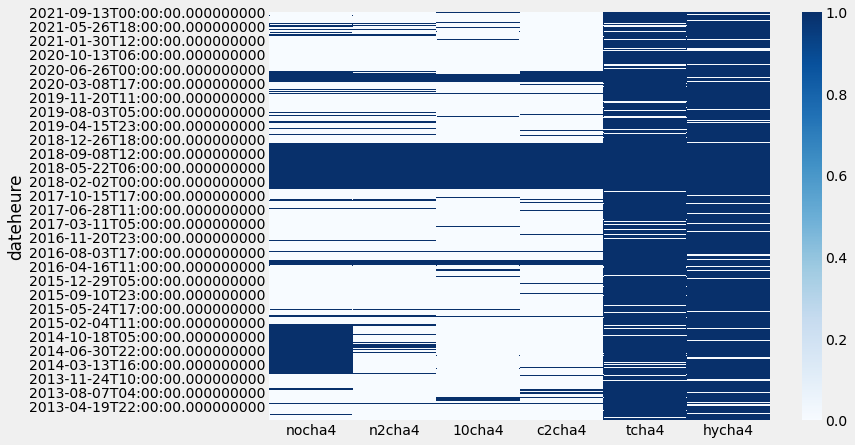

In [18]:
# heatmap des valeurs manquantes : foncé = valeur manquante
# NB : 'dateheure' mis en index pour faciliter la lecture, à la place des numéros de ligne 
plt.figure(figsize=(10,7))
sns.heatmap(data.set_index('dateheure').isna(), cmap=sns.color_palette("Blues", as_cmap=True));

'c2cha4' contient le moins de valeurs manquantes.

# Données extraites

Nous allons désormais nous concentrer uniquement sur la concentration en CO2. 

## Nouveau dataframe

In [19]:
data_co2 = data.drop(['nocha4', 'n2cha4', '10cha4', 'tcha4', 'hycha4'], axis=1)

In [20]:
data_co2.head()

,dateheure,c2cha4
0,2021-09-13 00:00:00+00:00,464.0
1,2021-09-12 23:00:00+00:00,471.0
2,2021-09-12 22:00:00+00:00,503.0
3,2021-09-12 21:00:00+00:00,517.0
4,2021-09-12 20:00:00+00:00,552.0


In [21]:
# mettre 'dateheure' en index
data_co2 = data_co2.set_index('dateheure')

In [22]:
# vérification
data_co2.head()

,c2cha4
dateheure,
2021-09-13 00:00:00+00:00,464.0
2021-09-12 23:00:00+00:00,471.0
2021-09-12 22:00:00+00:00,503.0
2021-09-12 21:00:00+00:00,517.0
2021-09-12 20:00:00+00:00,552.0


In [23]:
# trier les dates par ordre croissant
data_co2.sort_index(inplace=True)

In [24]:
# vérification
data_co2.head()

,c2cha4
dateheure,
2013-01-01 01:00:00+00:00,776.0
2013-01-01 02:00:00+00:00,800.0
2013-01-01 03:00:00+00:00,799.0
2013-01-01 04:00:00+00:00,715.0
2013-01-01 05:00:00+00:00,622.0


## Valeurs manquantes

In [31]:
# proportions de données manquantes
data_co2.isna().sum()

c2cha4    15084
dtype: int64

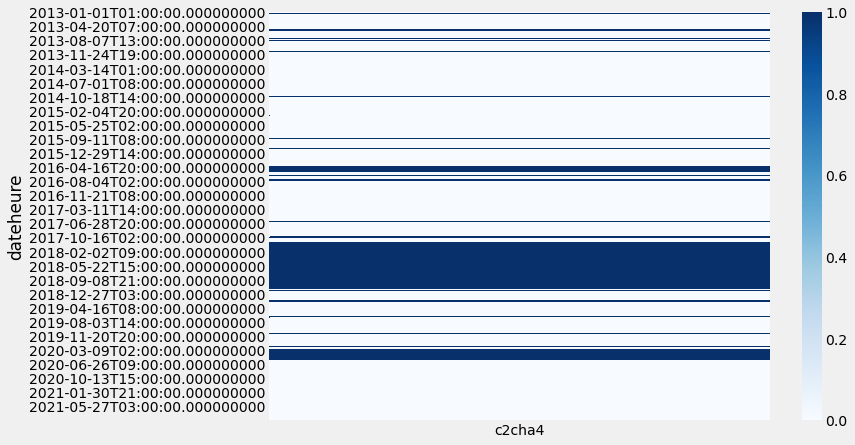

In [26]:
# heatmap des valeurs manquantes
plt.figure(figsize=(10,7))
sns.heatmap(data_co2.isna(), cmap=sns.color_palette("Blues", as_cmap=True));

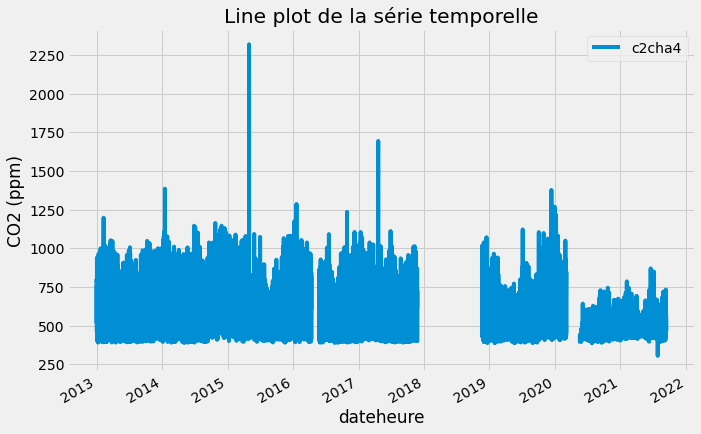

In [35]:
data_co2.plot(figsize=(10,7))
plt.ylabel("CO2 (ppm)")
plt.title('Line plot de la série temporelle');

Les données manquantes représentent environ 20% des valeurs.  

Il manque les données de 2018, et une partie de 2020, vraisemblablement lié au confinement.  

Notons que les valeurs qui suivent cette période sont plus basses qu'auparavant. 

## Nouvelle extraction

Pour limiter le nombre d'imputations, nous prenons ici en compte uniquement les données à partir de juin 2020. 

In [32]:
data_co2_ext = data_co2.loc['2020-06':]

In [33]:
data_co2_ext.head()

,c2cha4
dateheure,
2020-06-01 00:00:00+00:00,427.0
2020-06-01 01:00:00+00:00,421.0
2020-06-01 02:00:00+00:00,421.0
2020-06-01 03:00:00+00:00,421.0
2020-06-01 04:00:00+00:00,421.0


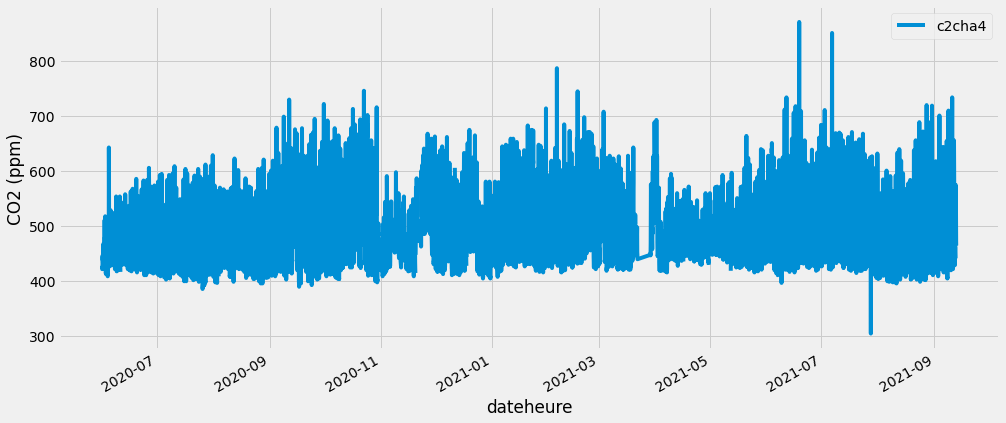

In [36]:
data_co2_ext.plot(figsize=(15,7))
plt.ylabel("CO2 (ppm)");

In [37]:
# nombre de lignes 
data_co2_ext.shape

(11089, 1)

In [38]:
# nombre de valeurs manquantes
data_co2_ext.isna().sum()

c2cha4    105
dtype: int64

Nous remplissons les valeurs manquantes par une interpolation linéaire :

In [39]:
data_co2_ext = data_co2_ext.interpolate(method='linear')

In [40]:
# vérification 
data_co2_ext.isna().sum()

c2cha4    0
dtype: int64

Nous travaillons désormais avec 11089 observations, sans aucune valeur manquante, comprises entre le 1e juin 2020 et le 13 septembre 2021.

### Sauvegarde

In [43]:
data_co2_ext.to_csv('datasets/data_co2_ext.csv')

---

# Sources

Données
* [source des données](https://datascience.etalab.studio/dgml/68a9b4de-1951-4bc5-bec2-bfadc57c0f34)
* [notice pdf](datasets/Notice-Qualit%C3%A9_Air-2017.12.27.pdf)

Points techniques
* [interpolate](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)
    
Informations sur la qualité de l'air
* [atmonormandie](http://www.atmonormandie.fr/L-air-le-b.a-ba/Polluants)

# Notes techniques

Conversion de type
* astype() ou pd.to_numeric() : semble ne pas fonctionner lorsqu'il y a par exemple le symbole < ou >

NLP
* str.contains : s'applique à une Series mais pas à un dataframe

# A faire
* supprimer les +00:00 dans datetime